In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import json

from geometry import City

In [3]:
conf = {
    "n":40,
    "m":40,
    "num_taxis":3,
    "request_rate":1,
    "log":False,
    "max_time":1000,
    "length":1000,
    "hard_limit":10,
    "show_map_labels":False,
    "behaviour" : "stay",
    "initial_conditions": "home",
    "show_pending":False,
    "show_plot":True,
    "matching":"baseline_random_user_nearest_taxi",
    "request_origin_distributions": [
        {
            "location": [
                5,
                5
            ],
            "strength": 1,
            "sigma": 5
        }
    ]
}

In [4]:
def plot_geoms(ind,num=int(5e5)):
    if 'request_destination_distributions' in conf:
        del conf['request_destination_distributions']
    if 'request_origin_distributions' in conf:
        del conf['request_origin_distributions']
    conf.update(geom_specs[ind])
    c = City(**conf)
    o = []
    d = []
    inds = []
    for i in range(num):
        ox,oy,dx,dy = c.create_one_request_coord()
        o.append((ox,oy))
        d.append((dx,dy))
    o = np.array(o)
    d = np.array(d)
        
    fig,ax = plt.subplots(1,2,figsize=(10,5.5))
    
    if 'request_destination_distributions' in geom_specs[ind]:
        fig.suptitle('Geometry '+str(ind)+'\n'+json.dumps(geom_specs[ind]['request_origin_distributions'])+'\n'+json.dumps(geom_specs[ind]['request_destination_distributions'])+'\n\n')
    else:
        fig.suptitle('Geometry '+str(ind)+'\n'+json.dumps(geom_specs[ind]['request_origin_distributions'])+'\n\n')
    ax[0].hist2d(o[:,0],o[:,1],bins=(conf['n'],conf['m']),range=((0,conf['n']),(0,conf['m'])),cmap='YlOrRd')
    ax[0].set_title('Origins')
    ax[1].hist2d(d[:,0],d[:,1],bins=(conf['n'],conf['m']),range=((0,conf['n']),(0,conf['m'])),cmap='YlOrRd')
    ax[1].set_title('Destinations')
    plt.subplots_adjust(top=0.8)
    #plt.savefig('figs/geom'+str(ind)+'.png')

In [5]:
geom_specs = [json.loads(e.strip('\n')) for e in open('configs/geom_specification_compact.json').readlines()]

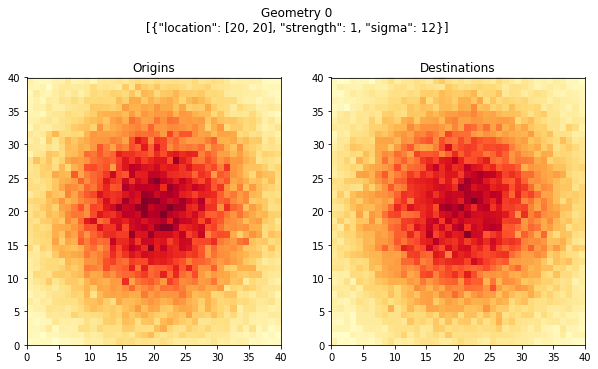

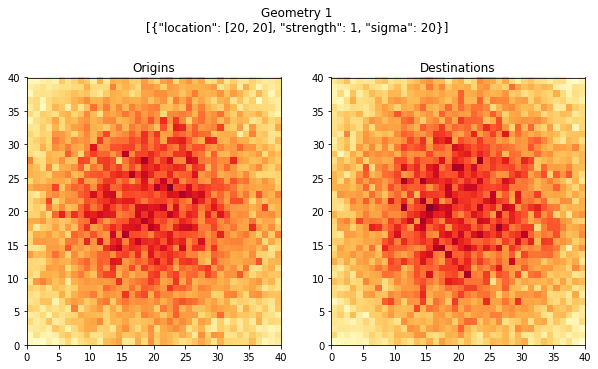

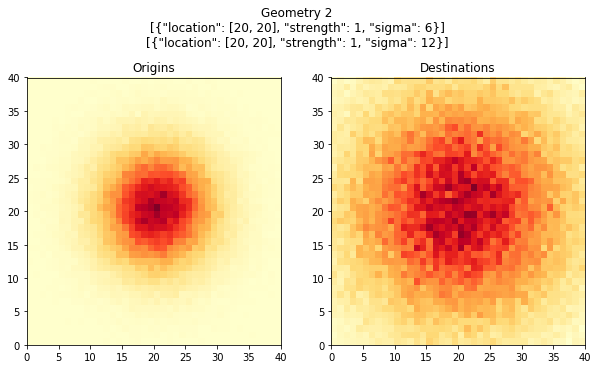

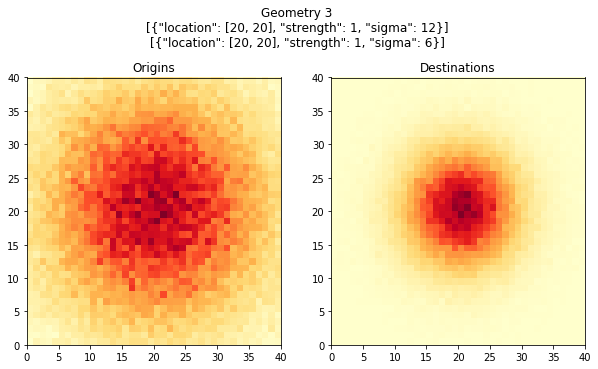

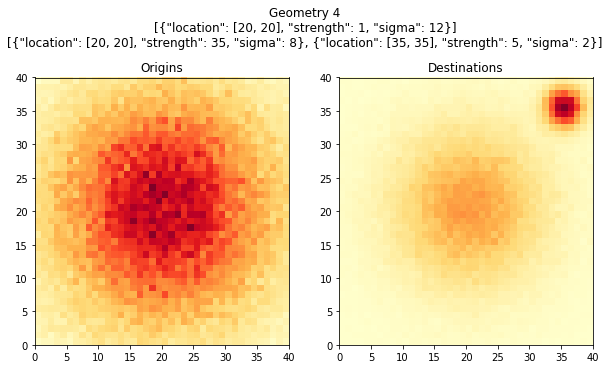

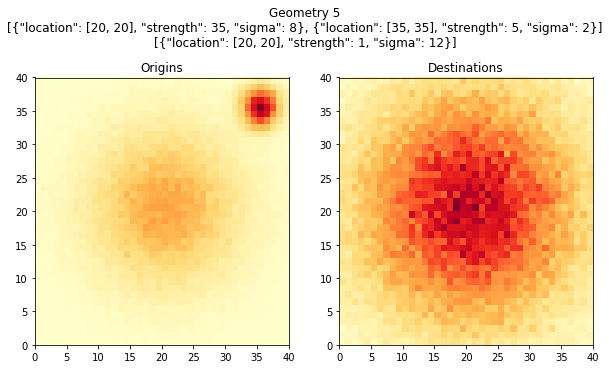

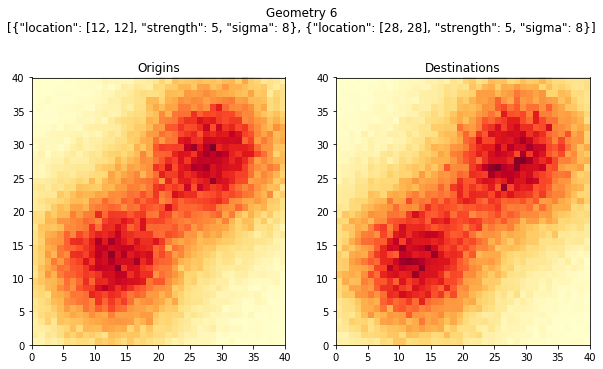

In [6]:
for i in range(len(geom_specs)):
    plot_geoms(i,int(1e5))